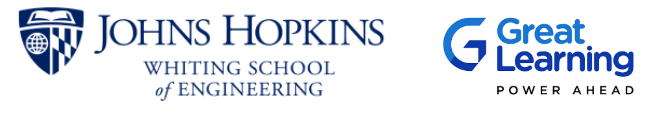

# **AI-Driven Loan Assessment**

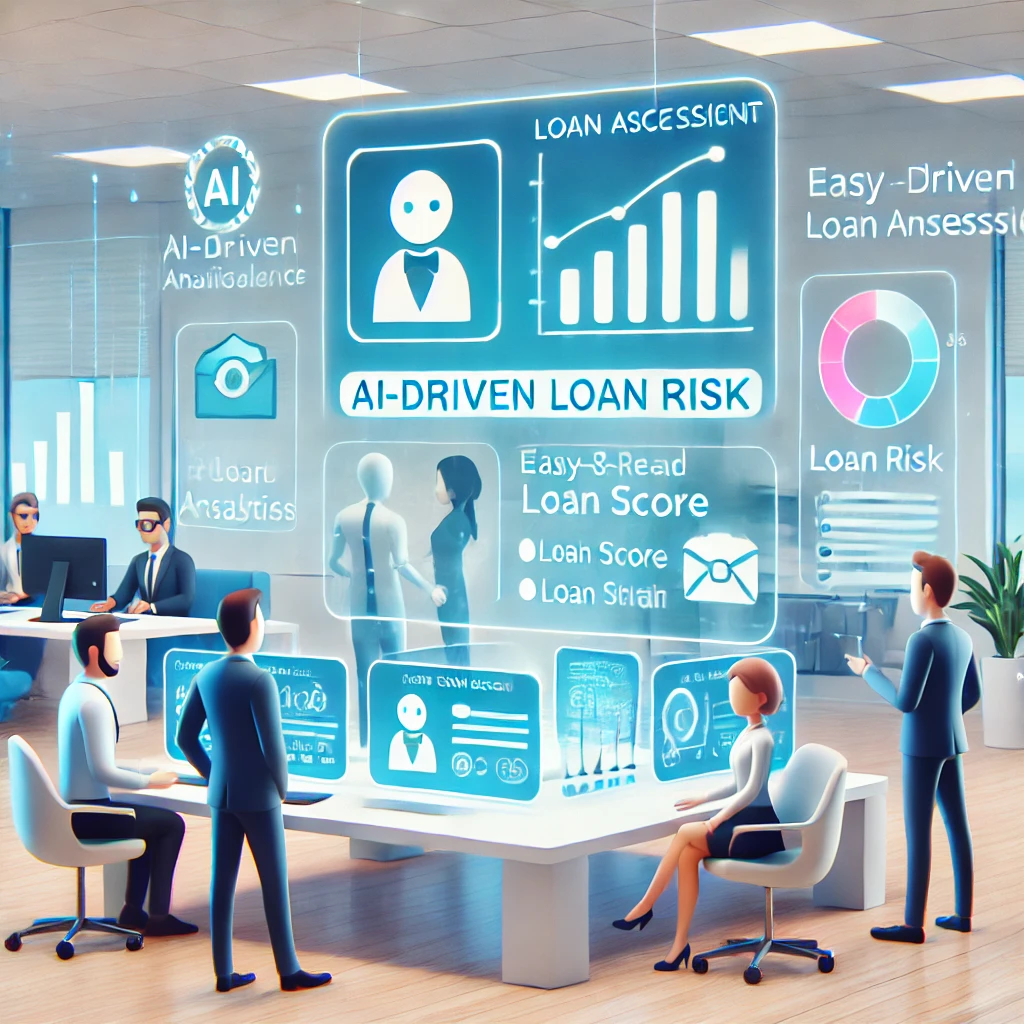

## **Problem Statement**

### **Business Context:**
PrimeEdge Lending has been experiencing high loan default rates (66.86%), significantly impacting its financial health. Initially, loan approvals were conducted manually, where loan officers reviewed applicant profiles (credit score, income, loan amount, reason for loan etc.) without a structured evaluation system.

However, this randomized decision-making approach led to a high number of risky loans being approved, especially for borrowers with:

* Low credit scores (85.23% default rate for 300-500 FICO range)
* High-risk loan purposes (e.g., personal loans with 69.28% default rate)

### **Need for Improvement:**

To enhance loan approval processes, PrimeEdge Lending needs a structured risk assessment framework.

Key areas for improvement:

✅ Consistent approval methodology to avoid subjective decision-making.

✅ Focus on default risk metrics, rather than arbitrary manual review.

✅ Ensure more profitable and low-risk lending to improve financial stability.

Key Performance Metrics
Since predicting loan default is a high-impact financial decision, accuracy alone is not enough. Instead, we focus on:

1. Precision → Measures how many predicted defaulters actually defaulted.

         * Important to avoid wrongly rejecting good borrowers who can repay.

2. Recall (Sensitivity) → Measures how many actual defaulters were correctly identified.

          * Important to prevent high-risk approvals that lead to financial losses.


3. F1 Score → A balance between Recall & Precision to ensure both risk minimization and business growth.



### **Rule-Based Business Logic for Loan Approval**

PrimeEdge Lending has implemented a rule-based approach for loan approvals to improve decision-making. The approval criteria are as follows:

### 1. **Credit Score (FICO) Rule**
- **300-500** → High risk (Denied)
- **>500** → Low to medium risk (Further evaluation required)

### 2. **Loan Purpose Consideration**
- **Risky Categories** (Personal, Other) → Stricter criteria
- **Safer Categories** (Medical) → Approved

### 3. **Income vs. Loan Amount Check**
- **Loan Amount >  5 x Income** → High risk (Denial)
- **Loan Amount <  5 x Income** → Low risk (Approval)

These rules help streamline the loan approval process while balancing risk and the nature of the loan purpose.

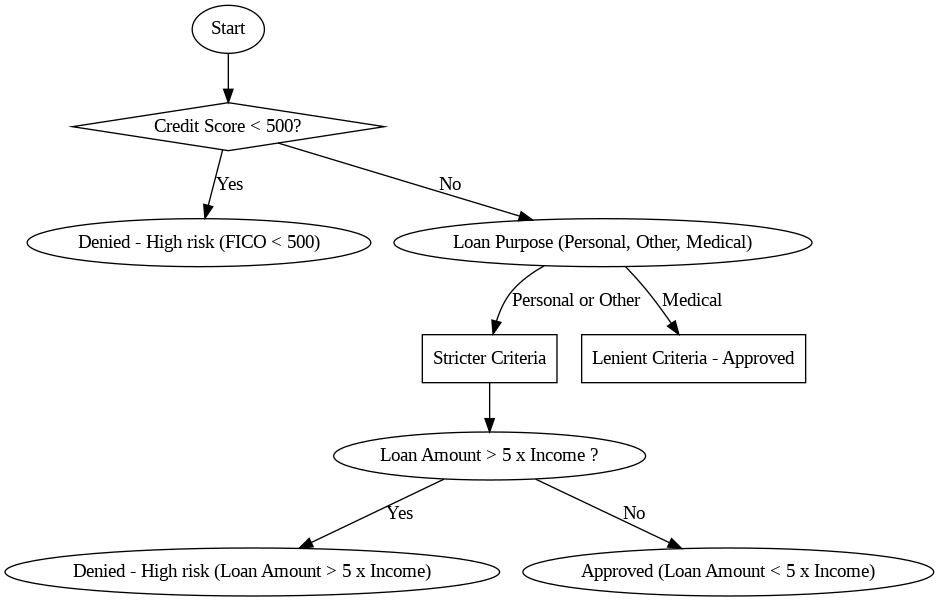

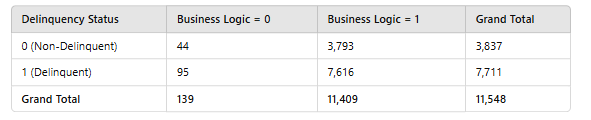

If they implement the business logic, they will be granting the loan to only the 139 applicant out of 11548 people (1.2%) and even after applying this, They were able to achieve an **precision of 66%**. As a result, PrimeEdge Lending has considered implementing a Machine Learning model to reduce the probability of loan defaults.

To do so, the bank has a dataset containing various borrower attributes, including loan term, gender, age group, loan purpose, home ownership status, credit score range, income, and loan amount. The goal is to analyze this data to build predictive models that can estimate the likelihood of a borrower defaulting on their loan.

By implementing this solution, the bank seeks to:

- Reduce financial losses caused by loan defaults.
- Improve risk assessment and decision-making.
- Enhance customer targeting by offering loans to individuals with lower default risks.

<hr>

### **Objective:**
1. **Identify Key Risk Factors:** Analyze the impact of features like income, loan amount, credit score range, and loan purpose on default probability.

2. **Develop Machine Learning Models:** Train multiple models, such as Support Vector Machines, Logistic Regression,	Decision Tree, Random Forest and K Nearest Neighbour, to predict loan defaults.

3. **Compare Model Performance:** Evaluate models based on training and testing accuracy, to select the most effective approach.


<hr>


### **Dataset**
* ID: Unique identifier for the borrower.
* Delinquency_Status: Binary indicator of whether the borrower is delinquent (1 => Yes, 0 => No).
* Loan_Term: Duration of the loan in months.
* Borrower_Gender: Gender of the borrower.
* Age_Group: Age group of the borrower.
* Loan_Purpose: Reason for taking the loan.
* Home_Status: Borrower's home ownership status.
* Credit_Score_Range: Range of the borrower's credit score.
* Income: Annual income of the borrower (in $1000s).
* Loan_Amount: Loan amount approved for the borrower.

## **Data Loading**

In [1]:
!pip install numpy==1.26.4
!pip install sweetviz==2.3.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 43.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 116.7 MB/s eta 0:00:00


In [1]:
"""
Generate a Python script that suppresses warnings, imports `pandas`, `numpy`, `train_test_split`, `matplotlib`, `seaborn`, and `scipy.stats`, and configures pandas to display all columns and 200 rows.
"""

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To perform statistical analysis
import scipy.stats as stats

In [2]:
"""
Write Python code to read a CSV file 'Loan_Delinquent_Analysis_Dataset.csv' into a DataFrame and create a copy of the DataFrame to preserve the original data.
"""
data = pd.read_csv("/content/Loan_Delinquent_Analysis_Dataset.csv")

# copying data to another varaible to avoid any changes to original data
loan = data.copy()

## **Overview of the data**

### View the first and last 5 rows of the dataset.

In [3]:
"""
Write Python code to display the first five rows of the DataFrame loan.
"""
loan.head()

,ID,Delinquency_Status,Loan_Term,Borrower_Gender,Loan_Purpose,Home_Status,Age_Group,Credit_Score_Range,Income,Loan_Amount
0,1,1,36 months,Male,House,Own,20-25,300-500,71,15000
1,2,0,36 months,Male,House,Rent,>25,300-500,112,20000
2,3,0,36 months,Male,Car,Rent,>25,>500,34,25000
3,4,1,36 months,Male,House,Rent,20-25,300-500,91,15000
4,5,1,36 months,Female,House,Mortgage,>25,300-500,80,5000


In [4]:
"""
Write Python code to display the last five rows of the DataFrame loan.
"""
loan.tail()

,ID,Delinquency_Status,Loan_Term,Borrower_Gender,Loan_Purpose,Home_Status,Age_Group,Credit_Score_Range,Income,Loan_Amount
11543,11544,0,36 months,Female,Car,Mortgage,20-25,300-500,62,5000
11544,11545,0,36 months,Female,Medical,Rent,>25,>500,61,25000
11545,11546,1,36 months,Male,House,Own,20-25,300-500,96,25000
11546,11547,1,36 months,Male,House,Mortgage,20-25,300-500,76,15000
11547,11548,1,36 months,Female,House,Mortgage,>25,>500,100,15000


### Understand the shape of the dataset.

In [5]:
"""
Write Python code to display the number of rows and columns of the DataFrame loan.
"""
loan.shape

(11548, 10)

* The dataset has 11548 rows and 10 columns of data

### Check the data types of the columns for the dataset.

In [6]:
"""
Write Python code to display the summary information of the loan DataFrame, including data types and non-null counts.
"""
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  11548 non-null  int64 
 1   Delinquency_Status  11548 non-null  int64 
 2   Loan_Term           11548 non-null  object
 3   Borrower_Gender     11548 non-null  object
 4   Loan_Purpose        11548 non-null  object
 5   Home_Status         11548 non-null  object
 6   Age_Group           11548 non-null  object
 7   Credit_Score_Range  11548 non-null  object
 8   Income              11548 non-null  int64 
 9   Loan_Amount         11548 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 902.3+ KB


### Summary of the dataset.

In [7]:
"""
Write Python code to display a summary of the loan DataFrame, including statistical information for all columns (numerical and categorical).
"""
loan.describe(include="all")

,ID,Delinquency_Status,Loan_Term,Borrower_Gender,Loan_Purpose,Home_Status,Age_Group,Credit_Score_Range,Income,Loan_Amount
count,11548.000000,11548.000000,11548,11548,11548,11548,11548,11548,11548.000000,11548.000000
unique,NaN,NaN,2,2,7,3,2,2,NaN,NaN
top,NaN,NaN,36 months,Male,House,Mortgage,20-25,300-500,NaN,NaN
freq,NaN,NaN,10524,6575,6856,5496,5908,6363,NaN,NaN
mean,5774.500000,0.667735,NaN,NaN,NaN,NaN,NaN,NaN,69.410201,14971.856599
std,3333.764789,0.471046,NaN,NaN,NaN,NaN,NaN,NaN,28.798849,7095.312054
min,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,5000.000000
25%,2887.750000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,44.000000,10000.000000
50%,5774.500000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,15000.000000
75%,8661.250000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,94.000000,20000.000000


In [8]:
"""
Write Python code to check the number of unique values in the 'ID' column of the loan DataFrame.
"""
# checking for unique values in ID column
loan["ID"].nunique()

11548

* Since all the values in ID column are unique we can drop it

In [9]:
"""
Write Python code to drop the 'ID' column from the loan DataFrame in place.
"""
loan.drop(["ID"], axis=1, inplace=True)

### Check for missing values

In [10]:
"""
Write Python code to check the total number of missing (null) values in each column of the loan DataFrame.
"""
loan.isnull().sum()

,0
Delinquency_Status,0
Loan_Term,0
Borrower_Gender,0
Loan_Purpose,0
Home_Status,0
Age_Group,0
Credit_Score_Range,0
Income,0
Loan_Amount,0


* There are no missing values in the dataset

## **Exploratory Data Analysis (EDA)**

### Data Cleaning

In [11]:
"""
Write Python code to display the unique values in the 'Loan_Purpose' column of the loan DataFrame.
"""
loan["Loan_Purpose"].unique()

array(['House', 'Car', 'Personal', 'Other', 'Wedding', 'Medical', 'other'],
      dtype=object)

- We can merge the purpose -  'other' and 'Other' together

In [12]:
"""
Write Python code to replace the value 'other' with 'Other' in the 'Loan_Purpose' column of the loan DataFrame and print the updated unique values in that column.
"""
loan["Loan_Purpose"].replace("other", "Other", inplace=True)
print(loan["Loan_Purpose"].unique())

['House' 'Car' 'Personal' 'Other' 'Wedding' 'Medical']


### EDA

**The below library (sweetviz) helps you in performing EDA on your data in few steps.**

Run this below cell only once, and do not run this cell after the session restarts

In [13]:
"""
Write Python code to generate and save an interactive analysis report of the loan DataFrame using the sweetviz library, and save it as 'report.html'.
"""
import sweetviz as sv

# Generate the report
report = sv.analyze(loan[['Delinquency_Status', 'Loan_Term', 'Borrower_Gender', 'Loan_Purpose',
       'Home_Status', 'Age_Group', 'Credit_Score_Range', 'Income', 'Loan_Amount']], )
report.show_html('report.html')  # Save the report as an HTML file

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## **Data Preprocessing**

### Data Preparation for Modeling

In [14]:
"""
Write Python code to separate the features (X) by dropping the 'Delinquency_Status' column and assign the target variable (y) as the 'Delinquency_Status' column from the loan DataFrame.
"""
X = loan.drop(["Delinquency_Status"], axis=1)
y = loan["Delinquency_Status"]

In [15]:
"""
Write Python code to apply one-hot encoding to the categorical variables in X, convert the resulting columns to float type, and display the first five rows of X
"""
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)

X = X.astype(float)
X.head()

,Income,Loan_Amount,Loan_Term_60 months,Borrower_Gender_Male,Loan_Purpose_House,Loan_Purpose_Medical,Loan_Purpose_Other,Loan_Purpose_Personal,Loan_Purpose_Wedding,Home_Status_Own,Home_Status_Rent,Age_Group_>25,Credit_Score_Range_>500
0,71.0,15000.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,112.0,20000.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,34.0,25000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,91.0,15000.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,80.0,5000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Creating training and test sets.**

In [16]:
"""
Write Python code to split the data into training and test sets (70%/30%), print the number of rows in each set, and display the class distribution percentages in both the training and test sets.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])
print("-"*50)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("-"*50)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Number of rows in train data = 8083
Number of rows in test data = 3465
--------------------------------------------------
Percentage of classes in training set:
Delinquency_Status
1    0.665718
0    0.334282
Name: proportion, dtype: float64
--------------------------------------------------
Percentage of classes in test set:
Delinquency_Status
1    0.672439
0    0.327561
Name: proportion, dtype: float64


## **Multiple Model Building**

In [17]:
"""
Write Python code to import evaluation metrics (classification_report, accuracy_score, precision_score, recall_score, f1_score) from sklearn.metrics and initialize an empty list algo_performance_list to store algorithm performance results.
"""
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
algo_performance_list = []

In [18]:
# @title 1. Support Vector Machines

# @markdown Support Vector Machines (SVM) are supervised learning algorithms used for classification and regression tasks. They work by finding the hyperplane that best separates data points of different classes in a high-dimensional space.

"""
Write Python code to train a Support Vector Machines model, make predictions, display the classification report, and append the training accuracy, testing accuracy, precision, recall, and F1 score to a performance list.
"""
from sklearn.svm import SVC

SVC = SVC()
SVC.fit(X_train,y_train)
Y_pred = SVC.predict(X_test)
print(classification_report(y_test,Y_pred))

# Calculate the training_accuracy, testing_accuracy, precision, recall, and f1 score
training_accuracy = SVC.score(X_train,y_train)
testing_accuracty = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')

algo_performance_list.append(['Support Vector Machines', training_accuracy, testing_accuracty, precision, recall, f1])

print(f"Training Score :- {SVC.score(X_train,y_train)}")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1135
           1       0.67      1.00      0.80      2330

    accuracy                           0.67      3465
   macro avg       0.34      0.50      0.40      3465
weighted avg       0.45      0.67      0.54      3465

Training Score :- 0.6657181739453173


In [19]:
# @title 2. Logistic Regression
# @markdown Logistic Regression is a statistical model used for binary classification tasks, where it predicts the probability of a class label using a logistic (sigmoid) function. It works by modeling the relationship between input features and the log-odds of the outcome.

"""
Write Python code to train a Logistic Regression model, make predictions, display the classification report, and append the training accuracy, testing accuracy, precision, recall, and F1 score to a performance list.
"""
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train,y_train)
Y_pred = LR.predict(X_test)
print(classification_report(y_test,Y_pred))

# Calculate the training_accuracy, testing_accuracy, precision, recall, and f1 score
training_accuracy = LR.score(X_train,y_train)
testing_accuracty = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')

algo_performance_list.append(['Logistic Regression', training_accuracy, testing_accuracty, precision, recall, f1])

print(f"Training Score :- {LR.score(X_train,y_train)}")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1135
           1       0.67      1.00      0.80      2330

    accuracy                           0.67      3465
   macro avg       0.34      0.50      0.40      3465
weighted avg       0.45      0.67      0.54      3465

Training Score :- 0.6657181739453173


In [20]:
# @title 3. Decision Tree
# @markdown A Decision Tree is a supervised learning algorithm used for classification and regression tasks, where it splits data into subsets based on feature values to make decisions. It creates a tree-like structure with nodes representing decisions, and branches representing the outcomes of those decisions.

"""
Write Python code to train a Decision Tree model, make predictions, display the classification report, and append the training accuracy, testing accuracy, precision, recall, and F1 score to a performance list.
"""
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
Y_pred = DTC.predict(X_test)
print(classification_report(y_test,Y_pred))

# Calculate the training_accuracy, testing_accuracy, precision, recall, and f1 score
training_accuracy = DTC.score(X_train,y_train)
testing_accuracty = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')

algo_performance_list.append(['Decision Tree', training_accuracy, testing_accuracty, precision, recall, f1])

print(f"Training Score :- {DTC.score(X_train,y_train)}")

              precision    recall  f1-score   support

           0       0.35      0.40      0.37      1135
           1       0.69      0.64      0.66      2330

    accuracy                           0.56      3465
   macro avg       0.52      0.52      0.52      3465
weighted avg       0.58      0.56      0.57      3465

Training Score :- 0.9475442286279847


In [21]:
# @title 4. Random Forest
# @markdown Random Forest is an ensemble learning method that builds multiple decision trees and merges their results to improve accuracy and reduce overfitting. It randomly selects subsets of data and features to train each tree, and the final prediction is made by aggregating the outputs (e.g., majority voting for classification).
"""
Write Python code to train a Random Forest model, make predictions, display the classification report, and append the training accuracy, testing accuracy, precision, recall, and F1 score to a performance list.
"""
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
Y_pred = RFC.predict(X_test)
print(classification_report(y_test,Y_pred))

# Calculate the training_accuracy, testing_accuracy, precision, recall, and f1 score
training_accuracy = RFC.score(X_train,y_train)
testing_accuracty = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')

algo_performance_list.append(['Random Forest', training_accuracy, testing_accuracty, precision, recall, f1])

print(f"Training Score :- {RFC.score(X_train,y_train)}")

              precision    recall  f1-score   support

           0       0.33      0.28      0.31      1135
           1       0.67      0.72      0.70      2330

    accuracy                           0.58      3465
   macro avg       0.50      0.50      0.50      3465
weighted avg       0.56      0.58      0.57      3465

Training Score :- 0.9475442286279847


In [22]:
# @title 5. K Nearest Neighbour
# @markdown K-Nearest Neighbors (KNN) is a simple, instance-based learning algorithm used for classification and regression. It classifies a data point based on the majority class of its K closest neighbors in the feature space.
"""
Write Python code to train a K Nearest Neighbour model, make predictions, display the classification report, and append the training accuracy, testing accuracy, precision, recall, and F1 score to a performance list.
"""
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
Y_pred = KNN.predict(X_test)
print(classification_report(y_test,Y_pred))

# Calculate the training_accuracy, testing_accuracy, precision, recall, and f1 score
training_accuracy = KNN.score(X_train,y_train)
testing_accuracty = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='weighted')
recall = recall_score(y_test, Y_pred, average='weighted')
f1 = f1_score(y_test, Y_pred, average='weighted')

algo_performance_list.append(['K Nearest Neighbors', training_accuracy, testing_accuracty, precision, recall, f1])

print(f"Training Score :- {KNN.score(X_train,y_train)}")

              precision    recall  f1-score   support

           0       0.34      0.22      0.27      1135
           1       0.67      0.79      0.73      2330

    accuracy                           0.60      3465
   macro avg       0.51      0.50      0.50      3465
weighted avg       0.56      0.60      0.58      3465

Training Score :- 0.7246072002969195


## **Multiple Model Comparision**

In [23]:
"""
Write Python code to create a DataFrame from the algo_performance_list with columns for algorithm name, accuracy, and training score, once this is done now sort the dataframe by accuracy and display the results.
"""
Algo_df = pd.DataFrame(algo_performance_list,columns=["Algorithm", "Training_Accuracy", "Testing_Accuracty", "Precision", "Recall", "F1"])
Algo_df.sort_values(by="Precision", ascending=False)

,Algorithm,Training_Accuracy,Testing_Accuracty,Precision,Recall,F1
2,Decision Tree,0.947544,0.560750,0.575865,0.560750,0.567266
4,K Nearest Neighbors,0.724607,0.602020,0.563566,0.602020,0.575833
3,Random Forest,0.947544,0.578355,0.562060,0.578355,0.569039
0,Support Vector Machines,0.665718,0.672439,0.452174,0.672439,0.540736
1,Logistic Regression,0.665718,0.672439,0.452174,0.672439,0.540736



**1.   After training multiple models, the vanilla Decision Tree model outperformed its peers in terms of precision. Here we are focusing on the precision beacuase Important to avoid rejecting good borrowers who can repay.**

**2. When the Decision Tree model was applied to the entire dataset, it achieved a precision of 66%, which is nearly identical to the precision achieved through the business logic-based decisions.**

**3. Also note, the accuracy of Decision Tree is very high on Training data as compared to testing data which tell that model is overfitting and require hyperparameter tuning**



## **Conclusion**

**Previously, PrimeEdge Lending used business logic for granting loans. Should they switch to using a Machine Learning model for decision-making?**

**Let's compare the results from the business logic and the ML model**





# 📌 Comparing Business Logic vs. ML Model for Loan Default Prediction

We need to compare how well the **business logic** and the **machine learning (ML) model** perform in predicting loan defaults. To do this, we will analyze precision and recall for both approaches.

---

## **1️⃣ Business Logic Performance**  

### **Confusion Matrix (Business Logic)**  

| Delinquency Status | Predicted Non-Delinquent (0) | Predicted Delinquent (1) | Grand Total |
|--------------------|-----------------------------|---------------------------|-------------|
| **Actual Non-Delinquent (0)** | 44 | 3,793 | 3,837 |
| **Actual Delinquent (1)** | 95 | 7,616 | 7,711 |
| **Grand Total** | 139 | 11,409 | 11,548 |

### **Metrics for Business Logic**  

- **Precision:** = 66.75\%

- **Recall:**  = 98.77\%

---

## **2️⃣ ML Model (Decision Tree Classifier - DTC) Performance**  

### **Confusion Matrix (ML Model)**  

| Delinquency Status | Predicted Non-Delinquent (0) | Predicted Delinquent (1) | Grand Total |
|--------------------|-----------------------------|---------------------------|-------------|
| **Actual Non-Delinquent (0)** | 1,394 | 2,443 | 3,837 |
| **Actual Delinquent (1)** | 2,897 | 4,814 | 7,711 |
| **Grand Total** | 4,291 | 7,257 | 11,548 |

### **Metrics for ML Model**  

- **Precision:** = 66.35\%

- **Recall:**  = 62.45\%

---

## **3️⃣ Business Decision Analysis**
- **Business Logic Strengths:**
  - ✅ **Very high recall (98.77%)**, meaning it catches nearly all defaulters.
  - ⚠️ **Moderate precision (66.75%)**, meaning that around **33.25% of flagged defaulters are actually not defaulters**.
  - ✅ It is a rule-based system, easy to implement, and interpretable.

- **ML Model Strengths:**
  - ⚠️ **Slightly lower precision (66.35%)** than the business logic.
  - ❌ **Much lower recall (62.45%)**, meaning it is **missing a lot of actual defaulters**.
  - 🔄 Potential to improve with better feature engineering and hyperparameter tuning.

### **Trade-offs:**
- **If business wants to minimize false negatives (i.e., avoid approving bad loans), business logic is better because of its high recall.**  
- **If business wants a balanced approach with more true approvals, ML might be better but needs improvement.**

---

## **Final Decision & Recommendation**
✅ **Business Logic is currently the better approach** because:
1. It captures **almost all defaulters (98.77% recall)**.
2. ML model has **low recall (62.45%)**, meaning it **misses too many defaulters**.
3. The precision difference between both is very small (66.75% vs 66.35%), so there is no significant gain from using ML yet.

💡 **Future Recommendation:**
- **Improve the ML model** by adding better features, tuning hyperparameters, and possibly using ensemble models (e.g., Random Forest, XGBoost).
- **If ML model can achieve recall close to business logic (~90%) while maintaining similar or better precision, it would be a better choice.**

---

## **Final Remark**  
**For now, the business should continue using its existing business logic for loan default prediction. The ML model needs further improvements before it can be adopted.** 🚀



**What could be the reasons for ML model to not perform better ?**

- Poor quality or insufficient data (e.g., imbalanced data).
- The need for more feature engineering or feature extraction.
- The choice of the wrong model for the given problem.



**Let's say the business decides to go ahead with the ML model, How and Which model should be selected ?**

- The best-performing models should be chosen.
- All models should be deployed in production on the same dataset, and their performance should be evaluated.
- An ensemble of the best-performing models can be created.
- The evaluation metrics should be analyzed to determine which model has the most significant impact.
- Considerations should be made regarding whether explainability is important for the specific use case or if there are legal obligations to ensure explainability.
- The required level of explainability should be evaluated based on the context of the model’s application.


# **Additional Content**

From the above dataframe, we can conclude that two models are performing similarly with the highest accuracy. Therefore, let's focus on improving the model's accuracy further.

In [24]:
# @title Improving Logistic Regression Model

"""
Write Python code to train and evaluate Logistic Regression models with different solver and penalty combinations, print the accuracy for each combination, and store the results in a list.
"""
params = [ ['lbfgs','l2'],['lbfgs', None],
           ['liblinear','l1'],['liblinear','l2'],
           ['newton-cg','l2'],['newton-cg', None],
           ['sag','l2'],
           ['saga','l1'],['saga','l2'],['saga', None]  ]

all_combinations = []

for i in params:
    model = LogisticRegression(solver=i[0] , penalty=i[1])
    model.fit(X_train,y_train)
    Y_pred = model.predict(X_test)

    acc = accuracy_score(y_test,Y_pred)

    print(f"{i} ---> {acc} ")

    all_combinations.append([i[0],i[1],acc])

['lbfgs', 'l2'] ---> 0.6724386724386724 
['lbfgs', None] ---> 0.6724386724386724 
['liblinear', 'l1'] ---> 0.6724386724386724 
['liblinear', 'l2'] ---> 0.6724386724386724 
['newton-cg', 'l2'] ---> 0.6724386724386724 
['newton-cg', None] ---> 0.6724386724386724 
['sag', 'l2'] ---> 0.6724386724386724 
['saga', 'l1'] ---> 0.6724386724386724 
['saga', 'l2'] ---> 0.6724386724386724 
['saga', None] ---> 0.6724386724386724 


In [25]:
"""
Write Python code to define a function that finds and returns the solver and penalty combination with the highest accuracy from a list of model results.
"""
def Get_Best_combintion(Values_List):
    max_val = 0
    max_index = 0
    for i in Values_List:
        if max_val < i[2]:
            max_val = i[2]
            max_index = Values_List.index(i)
    return Values_List[max_index]

Get_Best_combintion(all_combinations)

['lbfgs', 'l2', 0.6724386724386724]

After attempting to optimize the logistic regression, we haven't observed any noticeable difference. All the penalties and solvers are producing the same output. Similarly, you can try optimizing the SVM, but it may take time, as SVMs are typically used when the dataset is small.

# **Further Improvements**
- You can try hyperparameter tuning for all of the ML models to optimize their performance.
- Below provided image is the sample of the hyperparameter tuning done on the ML models.

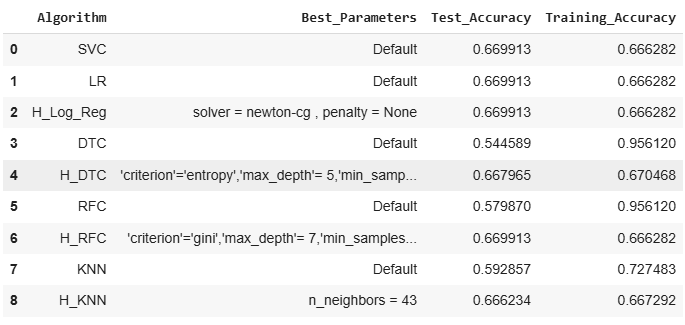